# Importing Libraries

In [432]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [433]:
df=pd.read_excel("Assignment1.xlsx")
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


## Data Insights

In [434]:
df.shape

(16834, 16)

* Data comprises of 16834 observations and 16 features
* I will use 14 features.Out of which one is dependent variable and rest 13 are independent.
* "clicks" and "link_clicks" are dependent feature columns which I will used in two different task:    
   First I will used feature columns from "campaign_platform" till "impressions" and try to analyse      that if user click on advertisment or not.   
   In second phase I will analyse that if user click on certain advertisment to watch, then user 
   click the link present in ads to further know about the product or make a decision to purchase the
   product.
* First I will use "click" feature as dependent variable and then use it as independent variable in     second phase to analyze "link-clicks" 

In [435]:
df.columns.values

array(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type',
       'creative_type', 'creative_name', 'device', 'age', 'spends',
       'impressions', 'clicks', 'link_clicks'], dtype=object)

* Label of each column

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null datetime64[ns]
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 2.1+ MB


* There are certain features columns present in database which are not integers or float. I will use   these columns as categorical features using One Hot Encoding (for small categories) or Binary         Encoding (when cardinality of column is higher).  

In [437]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


* This tells the distribution of dataset is skewed right. The mean will have a higher value than the   median.A data set distribution that is skewed right is asymmetrical and has a large number of         values at the lower end and few numbers at the high end. 
* Notably large differnece in 75th %tile and max values of predictors.

* Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset.

# Understanding target variable

In [438]:
df.clicks.unique()

array([   0,    3,    2,   10,    4,    5,    1,   11,    9,    6,    7,
         19,    8,   17,   12,   15,   18,   36,   60,   24,   23,   48,
         35,   37,   32,   28,   14,   30,   26,   51,   16,   49,   42,
         47,   52,   43,   50,   13,   53,   20,   33,   29,   25,   40,
         27,   65,   39,   69,   66,   31,   54,   72,   21,   63,   22,
         57,   41,   76,  105,   46,   90,  113,   58,  133,   64,  125,
         78,  121,   77,  106,   38,   79,  129,   83,  103,   44,   87,
         88,  126,  108,  136,   85,   34,   59,   99,  109,   73,   70,
         84,  115,   56,   82,  117,   45,   74,  130,   62,  114,   55,
         68,   80,  124,   75,  147,   95,  116,  166,  100,  152,   86,
        219,   71,  102,  110,  168,  134,  142,  167,   67,   98,  145,
        172,  120,   93,  156,  137,   92,  160,  127,  324,   89,  426,
        128,  158,  162,  417,   94,  135,  418,  111,  199,   91,  396,
        143,  144,  254,  249,   61,  131,  391,  5

In [439]:
df.link_clicks.unique()

array([  0.,   9.,   1.,  nan,  21.,   2.,   6.,  18.,   4.,   7.,   3.,
        60.,   8.,  23.,  38.,   5.,  11.,  49.,  45.,  76.,  12.,  39.,
        24.,  43.,  72.,  62.,  27.,  95.,  42.,  22.,  75.,  36.,  14.,
        70.,  66.,  20.,  25.,  35.,  33.,  80.,  40.,  44.,  16.,  15.,
        30.,  31.,  61.,  34.,  17.,  19.,  65.,  37.,  10.,  28.,  56.,
        67.,  13.,  26., 137.,  29., 193., 187.,  46.,  55., 168.,  41.,
        84., 161.,  47.,  98.,  94., 190., 221.,  57., 266.,  59., 151.,
        68.,  48.,  54.,  82., 153., 192., 210., 222., 226., 149.,  58.,
       138., 177., 140., 134., 165., 207., 270., 290.,  63., 336., 363.,
       385.,  92.,  71., 358.,  99., 126., 377., 116.,  86., 260.,  85.,
        97., 284., 104., 274.,  93.,  83., 269., 122., 383., 108., 450.,
       135., 431., 131.,  32., 404., 414., 125., 308.,  96., 327., 333.,
       114., 379., 110., 335., 101., 382., 111., 324., 103., 321., 119.,
        53., 276.,  88., 252.,  77., 303., 299.,  8

* Target variables are continuous in nature
* Classification algorithms cannot be used for this problem. I have to use algorithms like regression,   RandomForest or decision trees.

# To check missing values

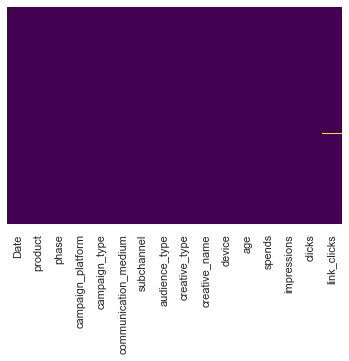

In [440]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Lines in Heatmap corresponding to link_clicks suggest that it contains "NaN" values which I replace by zero

In [441]:
df.link_clicks.replace(np.NaN, 0, inplace=True)

# To check correlation

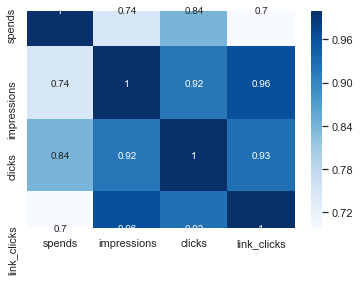

In [442]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

* "clicks" and "link_clicks" are highly correlated with each other, also "impressions" and "spends"      are correlated with "clicks" and "link-clicks" respectively 

# To check outliers

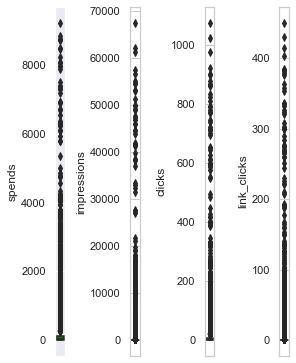

In [443]:
l = df.columns.values
number_of_columns=16
number_of_rows = len(l)-1/(number_of_columns*100)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(12,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

All feature columns show outliers

# To check distribution-Skewness

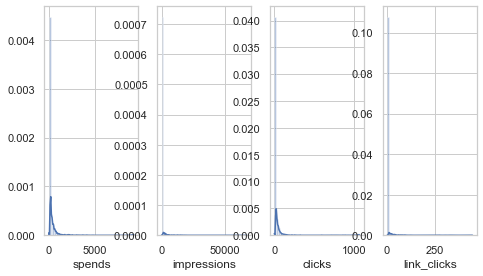

In [444]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(12,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

All independent variables are right skewed/positively skewed.

# Subchannel

Sub channel is under Google Search which type of keywords have been targeted and in Facebook which on subchannel we are target in.

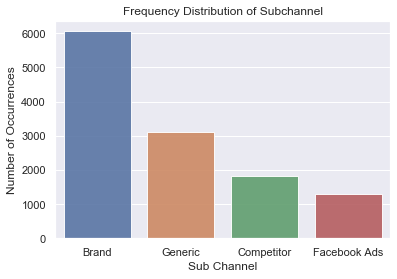

In [445]:
%matplotlib inline
df_sub=df.copy()
df_sub=df_sub[df_sub['spends']>0]
df_sub=df_sub[df_sub['clicks']>0]
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df_sub['subchannel'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Subchannel')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sub Channel', fontsize=12)
plt.show()

"Brand" keyword in sub channel make audience to click and watch the ads

#  Age groups

The Ads campaign analysis should be done across several age groups. This will help to know our digital advertisment should be focus on which age group.

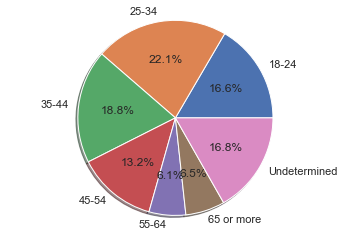

In [446]:
df_age=df.copy()
df_age=df_age[df_age['spends'] > 0]
df_age=df_age[df_age['clicks'] > 0]
labels = df_age['age'].astype('category').cat.categories.tolist()
counts = df_age['age'].value_counts()
sizes = [counts[var] for var in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

This distribution of age-group among audience gives information about the audience who spend some time to watch and click the advertisment when appear on their screen.

### Age analysis of audience if it make purchases

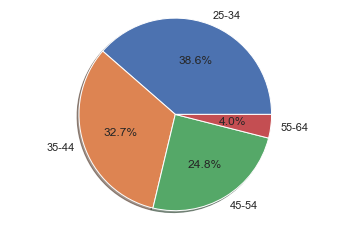

In [447]:
df_age=df_age[df_age['link_clicks'] > 0]
labels = df_age['age'].astype('category').cat.categories.tolist()
counts = df_age['age'].value_counts()
sizes = [counts[var] for var in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

This distribution of age-group among audience gives information about the audience who clicks the links present in ads to make the purchases or to gain further knowledge about product. 

# Devices

The audience watch product advertisments through which medium which helps to advertize our product on particular platform for better reach 

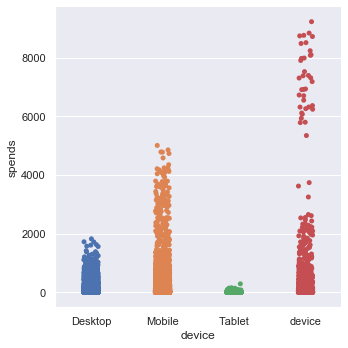

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="device", y="spends", order=["Desktop","Mobile","Tablet","device"], data=df)

# Impression correlation with clicks and link_clicks

The regression graph after how many times user click on ads if it is shown on a search result page,other site or platform network 

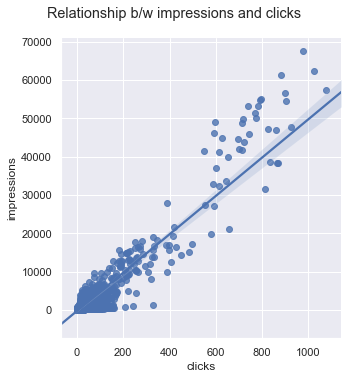

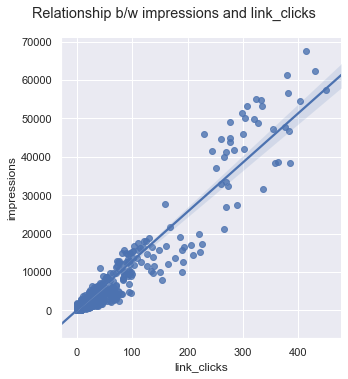

In [449]:
df_clicks=df.copy()
df_clicks=df_clicks[df_clicks['clicks']>0]
g = sns.lmplot(x="clicks",y="impressions",data=df);
g.fig.suptitle('Relationship b/w impressions and clicks',y=1.05);

df_clicks=df_clicks[df_clicks['link_clicks']>0]
k = sns.lmplot(x="link_clicks",y="impressions",data=df);
k.fig.suptitle('Relationship b/w impressions and link_clicks',y=1.05);

# Spends correlation with clicks and link_clicks

The regression graph shows how much time audience spends time to watch ads in proportional to number of clicks on ads

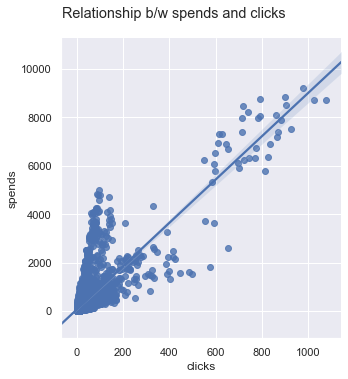

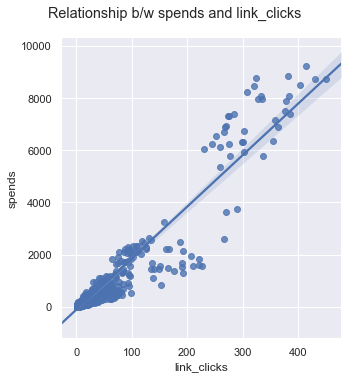

In [450]:
df_clicks=df.copy()
df_clicks=df_clicks[df_clicks['clicks']>0]
g = sns.lmplot(x="clicks",y="spends",data=df_clicks);
g.fig.suptitle('Relationship b/w spends and clicks',y=1.05);

df_clicks=df_clicks[df_clicks['link_clicks']>0]
k = sns.lmplot(x="link_clicks",y="spends",data=df_clicks);
k.fig.suptitle('Relationship b/w spends and link_clicks',y=1.05);

# Relation between clicks and link_clicks

Text(0.5, 1.05, 'Relationship b/w clicks and link_clicks')

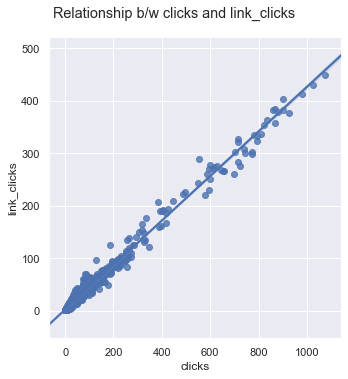

In [451]:
df_clicks=df.copy()
df_clicks=df_clicks[df_clicks['clicks']>0]
df_clicks=df_clicks[df_clicks['link_clicks']>0]
g = sns.lmplot(x="clicks",y="link_clicks",data=df_clicks)
g.fig.suptitle('Relationship b/w clicks and link_clicks',y=1.05)

# Campaign Platform

The advertisment platform which make user to click and spend time to watch that advertisment, then further user click on link present in advertisment to make the purchase or to gain insights about product. Facebook platform is only successful platform in able to do this I have find out in my analysis.

In [452]:
df_fb=df[df['spends']>0]
df_fb=df_fb[df_fb['impressions']>0]
df_fb=df_fb[df_fb['clicks']>0]
df_fb=df_fb[df_fb['link_clicks']>0]
df_fb.campaign_platform.unique()

array(['Facebook Ads'], dtype=object)

# Analysis of audience_type of Facebook

Only Facebook audience who push "link_clicks" and move towards the product after seeing the advertisment.

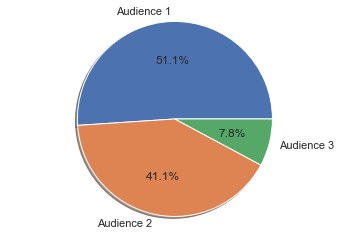

In [453]:
labels = df_fb['audience_type'].astype('category').cat.categories.tolist()
counts = df_fb['audience_type'].value_counts()
sizes = [counts[var] for var in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Creative Ads on facebook

Creative advertisments that make users to push "link_clicks"

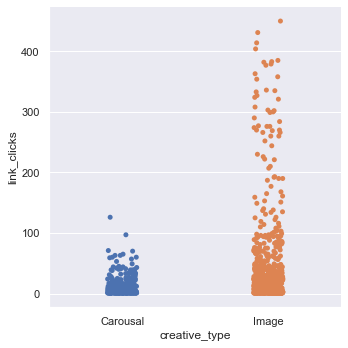

In [454]:
sns.catplot(x="creative_type", y="link_clicks", data=df_fb);

# Creative name or keywords of ads on facebook

The creative names of advertisments increase curiousity among audience to look out ads and increase "lin_clicks"

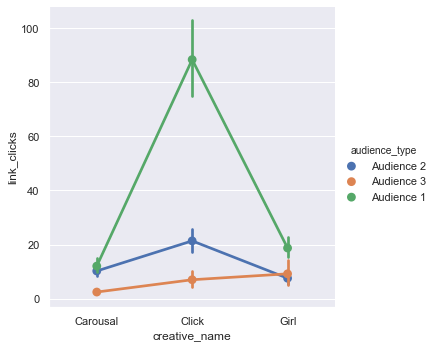

In [455]:
sns.catplot(x="creative_name", y="link_clicks",hue="audience_type",kind="point", data=df_fb);

# One Hot Encoding
The 'campaign_platform' will replace features columns 'campaign_type' and 'communication_medium' because "Google Ads" and "Facebook Ads" value in "campaign_platform" column maps to "Search" and "Conversions" in "campaign_type" column respectively. Similarly "Search Keywords" and "Creative" in "communication_medium" column maps to "Google Ads" and "Facebook Ads" in "campaign_type" column respectively.

The categorical feature columns in our database 'campaign_platform','subchannel','audience_type', 'creative_type', 'creative_name','device', 'age' in our database will be one- hot encoded for futher analysis.

Remove 'Date','product','phase','campaign_type','communication_medium' from the dataframe.

Also in first phase we are only calculating the number of "clicks" for advertisment so feature columns like 'audience_type','creative_type' and'creative_name' will be removed as these are irrelevant for "campaign_platform" like "Google"

I will also remove "link_clicks" column as it is dependent on "clicks" column. I have show this in my EDA analysis above.

In [456]:
df_onehot = df.copy()
df_onehot= df_onehot.drop(['Date','product','phase','campaign_type','communication_medium','audience_type','creative_type','creative_name','link_clicks'], axis=1)
df_onehot = pd.get_dummies(df_onehot, columns=['campaign_platform','subchannel','device','age'])
df_onehot.head()

,spends,impressions,clicks,campaign_platform_Facebook Ads,campaign_platform_Google Ads,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic,device_Desktop,device_Mobile,device_Tablet,device_device,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or more,age_Undetermined
0,0.00,2,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.00,5,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0.00,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,14.63,5,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,53.31,10,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In first phase I am calculating the number of clicks on ads by audience. I am not considering the column "audience_type","creative_type","creative_name" because these features are irrevelant for ads  on Google platform.

# Fit RandomForestRegressor 
To predict number of clicks on ads

In [457]:
#Splitting dataset into train and test data 
from sklearn.model_selection import train_test_split
y=df_onehot['clicks']
X=df_onehot.drop(['clicks'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [458]:
from sklearn.ensemble import RandomForestRegressor    
clf =RandomForestRegressor()
clf.fit(X_train,y_train)
y_decision=clf.predict(X_test)
yy_decision=clf.predict(X_train)

C:\Users\pgemi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Train and Test Score

In [459]:
from sklearn import metrics
print("Train Score: ",metrics.r2_score(yy_decision,y_train))
print("Test Score: ",metrics.r2_score(y_decision,y_test))

Train Score:  0.9915984783771176
Test Score:  0.9443982565677257


# Feature Importance

In [460]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

impressions                       0.903824
spends                            0.075513
subchannel_Brand                  0.009647
age_35-44                         0.003433
subchannel_Generic                0.003238
age_Undetermined                  0.001858
age_25-34                         0.001029
subchannel_Competitor             0.000463
age_18-24                         0.000314
age_45-54                         0.000248
device_Mobile                     0.000122
device_Desktop                    0.000121
subchannel_Facebook Ads           0.000065
campaign_platform_Facebook Ads    0.000048
device_device                     0.000035
campaign_platform_Google Ads      0.000022
age_55-64                         0.000009
age_65 or more                    0.000008
device_Tablet                     0.000003
dtype: float64

# Predict link_clicks

The "link_clicks" is important feature column for ads that move user to click on link present in advertisment to make the purchase or to gain insights about product. I analyse the data and conclude that ads have "link_clicks">0 when they are shown on "Facebook" platform. In second phase to predict "link_clicks" of ads, I will analyze data only related to "Facebook" platform.

# One Hot Encoding

The categorical feature columns in our database 'campaign_platform','audience_type', 'creative_type', 'creative_name','device', 'age' in our database will be one- hot encoded for futher analysis.

In [461]:
df_onehot = df.copy()
df_onehot = df[df['campaign_platform']=='Facebook Ads']
df_onehot= df_onehot.drop(['Date','product','phase','campaign_type','communication_medium'], axis=1)
df_onehot = pd.get_dummies(df_onehot, columns=['audience_type','creative_type','creative_name','device','age'])
df_onehot.head()

,campaign_platform,subchannel,spends,impressions,clicks,link_clicks,audience_type_Audience 1,audience_type_Audience 2,audience_type_Audience 3,creative_type_Carousal,creative_type_Image,creative_name_Carousal,creative_name_Click,creative_name_Girl,device_device,age_25-34,age_35-44,age_45-54,age_55-64
2009,Facebook Ads,Facebook Ads,70.28,730,12,9.0,0,1,0,1,0,1,0,0,1,1,0,0,0
2010,Facebook Ads,Facebook Ads,7.66,71,1,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0
2011,Facebook Ads,Facebook Ads,3.80,32,1,0.0,0,1,0,1,0,1,0,0,1,0,0,1,0
2012,Facebook Ads,Facebook Ads,0.45,3,0,0.0,0,1,0,1,0,1,0,0,1,0,0,0,1
2013,Facebook Ads,Facebook Ads,117.13,638,36,21.0,0,1,0,0,1,0,1,0,1,1,0,0,0


# RandomForestRegressor
To predict "link-clicks"

In [462]:
#Splitting dataset into train and test data 
from sklearn.model_selection import train_test_split
y=df_onehot['link_clicks']
X=df_onehot.drop(['link_clicks','campaign_platform','subchannel'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [463]:
from sklearn.ensemble import RandomForestRegressor    
clf =RandomForestRegressor()
clf.fit(X_train,y_train)
y_decision=clf.predict(X_test)
yy_decision=clf.predict(X_train)

C:\Users\pgemi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Train and Test Score

In [464]:
from sklearn import metrics
print("Train Score: ",metrics.r2_score(yy_decision,y_train))
print("Test Score: ",metrics.r2_score(y_decision,y_test))

Train Score:  0.9978176344583034
Test Score:  0.9852829841668425


# Feature Importance

In [465]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

clicks                      0.910458
impressions                 0.076063
spends                      0.011357
creative_name_Carousal      0.000465
creative_type_Carousal      0.000448
creative_type_Image         0.000320
age_25-34                   0.000316
audience_type_Audience 2    0.000145
creative_name_Girl          0.000120
age_35-44                   0.000102
creative_name_Click         0.000086
audience_type_Audience 1    0.000068
audience_type_Audience 3    0.000033
age_45-54                   0.000017
age_55-64                   0.000001
device_device               0.000000
dtype: float64